In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
ground_truth = pd.read_csv('microbench/r9nano.csv',index_col=0);ground_truth

,benchmark,numWfPerWG,numWG,time
0,empty_kernel,1,128,0.000013
1,empty_kernel,1,128,0.000014
2,empty_kernel,1,128,0.000013
3,empty_kernel,1,128,0.000014
4,empty_kernel,1,128,0.000013
5,empty_kernel,1,128,0.000014
6,empty_kernel,1,128,0.000013
7,empty_kernel,1,128,0.000014
8,empty_kernel,1,128,0.000013
9,empty_kernel,1,128,0.000014


In [20]:
ground_truth_agg = ground_truth.groupby(['numWfPerWG', 'numWG']).agg(np.mean).reset_index();
ground_truth_agg['env'] = 'R9Nano';
ground_truth_agg

,numWfPerWG,numWG,time,env
0,1,128,0.000014,R9Nano
1,1,256,0.000014,R9Nano
2,1,384,0.000015,R9Nano
3,1,512,0.000015,R9Nano
4,1,640,0.000016,R9Nano
5,1,768,0.000016,R9Nano
6,1,896,0.000017,R9Nano
7,1,1024,0.000017,R9Nano
8,2,128,0.000014,R9Nano
9,2,256,0.000014,R9Nano


In [21]:
simulation_result = pd.read_csv('gcn3sim_r9nano.csv', index_col=0); 
simulation_result['env']='GCN3Sim'
simulation_result

,benchmark,numWfPerWG,numWG,time,env
0,empty_kernel,1,128,6.550000e-07,GCN3Sim
1,empty_kernel,1,256,1.295000e-06,GCN3Sim
2,empty_kernel,1,384,1.935000e-06,GCN3Sim
3,empty_kernel,1,512,2.575000e-06,GCN3Sim
4,empty_kernel,1,640,3.215000e-06,GCN3Sim
5,empty_kernel,1,768,3.855000e-06,GCN3Sim
6,empty_kernel,1,896,4.495000e-06,GCN3Sim
7,empty_kernel,1,1024,5.135000e-06,GCN3Sim
8,empty_kernel,2,128,1.041000e-06,GCN3Sim
9,empty_kernel,2,256,2.064000e-06,GCN3Sim


In [22]:
data = ground_truth_agg.append(simulation_result);data

,benchmark,env,numWG,numWfPerWG,time
0,NaN,R9Nano,128,1,0.000014
1,NaN,R9Nano,256,1,0.000014
2,NaN,R9Nano,384,1,0.000015
3,NaN,R9Nano,512,1,0.000015
4,NaN,R9Nano,640,1,0.000016
5,NaN,R9Nano,768,1,0.000016
6,NaN,R9Nano,896,1,0.000017
7,NaN,R9Nano,1024,1,0.000017
8,NaN,R9Nano,128,2,0.000014
9,NaN,R9Nano,256,2,0.000014


(0.0, 3e-05)

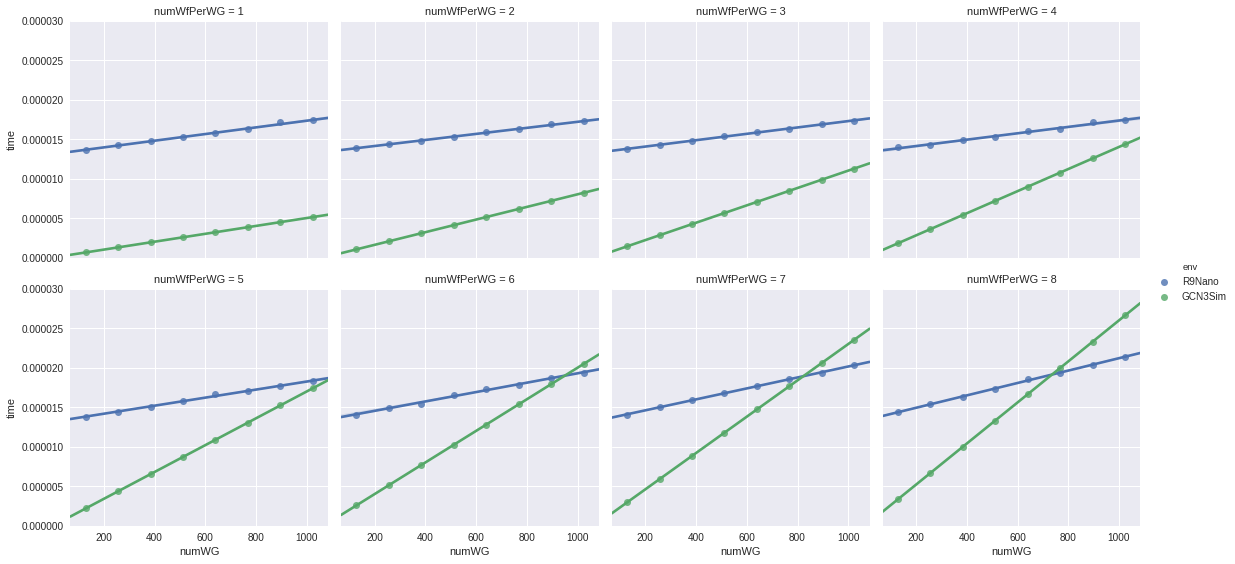

In [25]:
lm = sns.lmplot('numWG', 'time', data, col='numWfPerWG', hue='env', col_wrap=4, size=4)
lm.axes[0].set_ylim(0e-5, 3e-5)

In [27]:
data_wf = data[(data['numWfPerWG']==1) & (data['env']=='R9Nano')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.311529e-05
numWG        4.222832e-09
dtype: float64

In [28]:
data_wf = data[(data['numWfPerWG']==2) & (data['env']=='R9Nano')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.336694e-05
numWG        3.830330e-09
dtype: float64

In [29]:
data_wf = data[(data['numWfPerWG']==3) & (data['env']=='R9Nano')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.325670e-05
numWG        4.033386e-09
dtype: float64

In [30]:
data_wf = data[(data['numWfPerWG']==4) & (data['env']=='R9Nano')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.332147e-05
numWG        4.037525e-09
dtype: float64

In [31]:
data_wf = data[(data['numWfPerWG']==5) & (data['env']=='R9Nano')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.317565e-05
numWG        5.090939e-09
dtype: float64

In [32]:
data_wf = data[(data['numWfPerWG']==6) & (data['env']=='R9Nano')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.336916e-05
numWG        5.939798e-09
dtype: float64

In [33]:
data_wf = data[(data['numWfPerWG']==7) & (data['env']=='R9Nano')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.323406e-05
numWG        6.939300e-09
dtype: float64

In [34]:
data_wf = data[(data['numWfPerWG']==8) & (data['env']=='R9Nano')];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.337394e-05
numWG        7.849956e-09
dtype: float64

Conclusion: It takes 4 cycles to launch a workgroup if the number of wavefronts is 4 or less. If there are more than 4 wavefronts in a workgroup, it takes one more cycle per wavefront to dispatch one workgroup.